**Text based sentimental analysis**

In [1]:
#Load packages
import pandas as pd
import numpy as np

In [2]:
#Load data viz pkgs
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install neattext
!pip install --upgrade scikit-learn

In [4]:
import neattext.functions as nfx

In [5]:
#Load dataset
df = pd.read_csv("/content/amazon_cells_labelled.csv")

In [6]:
#Preview dataset
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df.shape

(31435, 2)

In [8]:
#Check for datatypes
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
#check for null values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
#valuecount of emotions
df['Emotion'].value_counts()

joy         9989
sadness     6078
fear        4891
anger       3853
surprise    3652
neutral     2039
disgust      794
shame        139
Name: Emotion, dtype: int64

<Axes: >

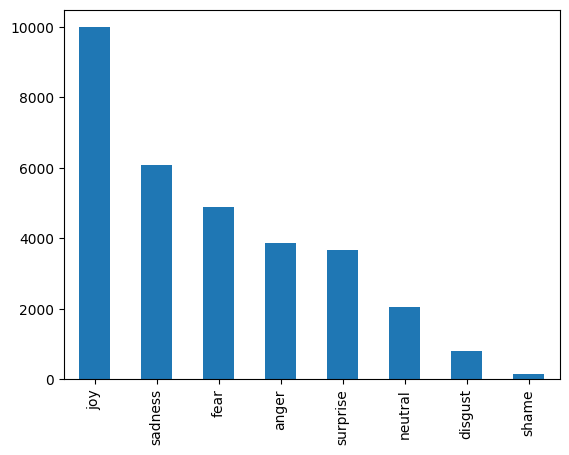

In [11]:
df['Emotion'].value_counts().plot(kind = "bar")

<Axes: xlabel='Emotion', ylabel='count'>

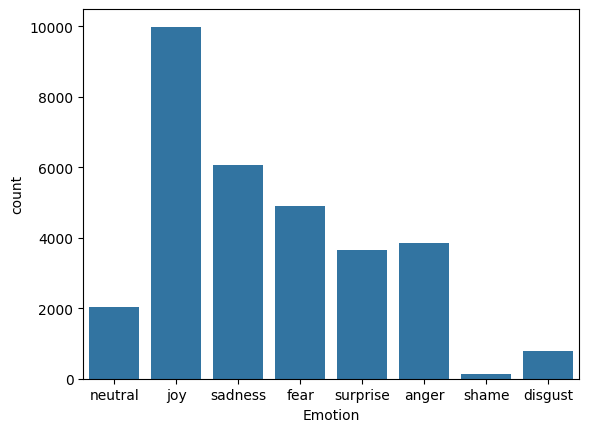

In [12]:
sns.countplot(x="Emotion",data=df)

#Exploration
+ Sentiment analysis
+ Keyword Ectraction
- Keywords for each emotion
-Wordcloud


In [13]:
# sentiment analysis
from textblob import TextBlob

In [14]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

In [15]:
get_sentiment("wow! such a beautiful day")

'Positive'

In [16]:
df["Sentiment"] = df["Text"].apply(get_sentiment)

In [17]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [18]:
#Compare emotion with sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1606
          Neutral      1253
          Positive      994
disgust   Negative      297
          Neutral       230
          Positive      267
fear      Negative     1373
          Neutral      1676
          Positive     1842
joy       Negative     1533
          Neutral      3301
          Positive     5155
neutral   Negative      160
          Neutral      1383
          Positive      496
sadness   Negative     2366
          Neutral      1913
          Positive     1799
shame     Negative       45
          Neutral        49
          Positive       45
surprise  Negative      561
          Neutral      1395
          Positive     1696
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

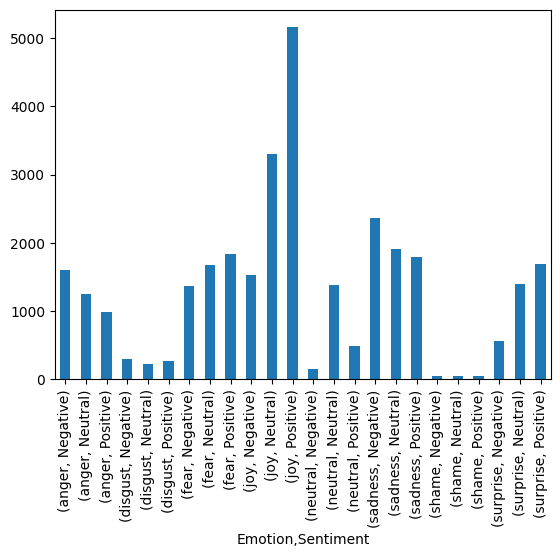

In [19]:
# First method using matplot lib
df.groupby(['Emotion','Sentiment']).size().plot(kind="bar")

In [20]:
!pip install --upgrade seaborn

In [21]:
#using seaborn
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

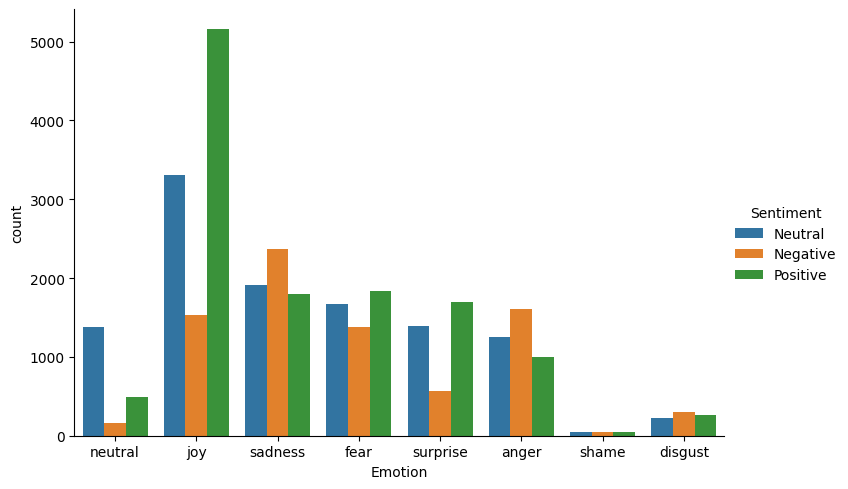

In [22]:
sns.catplot(x="Emotion", hue='Sentiment',data = df, kind='count',aspect=1.5)

#Text cleaning
Remove noise
stopwords
punctuations
emojis

In [23]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

## Edit

NeatText is not removing many stopwords so using nltk

In [24]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
df['Clean_Text'] = df['Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [26]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

## Edit

Changed it from df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles) to ensure tht stopwords, user handles and punctuations all are removed

In [27]:
#compare text with cleaned text
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS RE...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
31430,You block your dream when you allow your fear ...,block dream allow fear grow bigger faith ~Mary...
31431,I feel old. I don't recognize any Disney Chann...,feel old recognize Disney Channel shows Im old...
31432,"has dawned upon the world, promised from creat...",dawned upon world promised creationGods salvat...
31433,The computer at school had left out my name al...,computer school left name along four others ri...


#Keyword extraction
+ Extract most commenste word from emotiuons

In [28]:
from collections import Counter

In [29]:
def extract_keywords(text, num=50):
  tokens = [tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

In [30]:
emotion_list = df['Emotion'].unique().tolist()

In [31]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [32]:
joy_list=df[df["Emotion"] == "joy"]["Clean_Text"]

In [33]:
joy_list

1                           Sage Act upgrade list tommorow
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
12       life  Leopold must truly happy : hopes prayers...
17                         feeling fail french #fuckfrench
                               ...                        
31419    SECOND start telling   story cab driver starts...
31421    kids reaching stockings Xmas+watching smiles f...
31429                               Sale sale sale :quotgt
31432    dawned upon world promised creationGods salvat...
31433    computer school left name along four others ri...
Name: Clean_Text, Length: 9989, dtype: object

In [34]:
joy_list=df[df["Emotion"] == "joy"]["Clean_Text"].to_list()

In [35]:
joy_list

['Sage Act upgrade list tommorow',
 'eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom full health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  One hears sometimes child  picture health    always gives idea complete picture grownup health  loveliness ',
 '  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang',
 'life  Leopold must truly happy : hopes prayers beloved son seemed last come fruition ',
 'feeling fail french #fuckfrench',
 'GoodLet  go ',
 'fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile',
 'One could get terribly ecstatic would dangerous thing ',
 'selected study university',
 'Yeah  ’ ages  ',
 'passed BA exams first class results',
 'heard selected fot first year university Zambia form five Chikola secondary school',
 'Welp time study next days',
 'Heading campus rain take grad photos',
 'feeling awesome ',
 '  brings  Ive bo

In [36]:
joy_docx = ''.join(joy_list)

In [37]:
joy_docx

'Sage Act upgrade list tommoroweye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom full health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  One hears sometimes child  picture health    always gives idea complete picture grownup health  loveliness   ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko anglife  Leopold must truly happy : hopes prayers beloved son seemed last come fruition feeling fail french #fuckfrenchGoodLet  go fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhileOne could get terribly ecstatic would dangerous thing selected study universityYeah  ’ ages  passed BA exams first class resultsheard selected fot first year university Zambia form five Chikola secondary schoolWelp time study next daysHeading campus rain take grad photosfeeling awesome   brings  Ive bought Christmas presents trawl loads shops :)shit pants Pure 100% gravylife  

In [38]:
#Extract the keywords
keyword_joy = extract_keywords(joy_docx)

In [39]:
keyword_joy

{'amp': 591,
 'day': 555,
 'time': 445,
 'Im': 410,
 'like': 406,
 'get': 402,
 'work': 365,
 'Christmas': 349,
 'back': 300,
 'go': 290,
 'good': 289,
 'today': 287,
 'happy': 285,
 'tomorrow': 276,
 'one': 270,
 'love': 259,
 'going': 252,
 'night': 243,
 'home': 225,
 'got': 222,
 '2': 220,
 'see': 217,
 'school': 210,
 'first': 204,
 'morning': 202,
 'joy': 196,
 'life': 194,
 'hours': 184,
 'feel': 181,
 'year': 179,
 'much': 173,
 'long': 167,
 'people': 164,
 'week': 163,
 's': 162,
 'new': 160,
 'great': 157,
 'next': 154,
 'last': 151,
 'days': 151,
 'sleep': 148,
 'hour': 147,
 'RT': 145,
 'family': 143,
 'God': 135,
 'make': 134,
 'know': 134,
 ':)': 132,
 'us': 129,
 'would': 126}

In [40]:
#Plot
def plot_most_common_words(mydict):
  df_01 = pd.DataFrame(list(mydict.items()), columns=['token', 'count'])
  plt.figure(figsize=(20,10))
  sns.barplot(x='token', y='count', data = df_01, hue = "token")
  plt.xticks(rotation=45)
  plt.show()

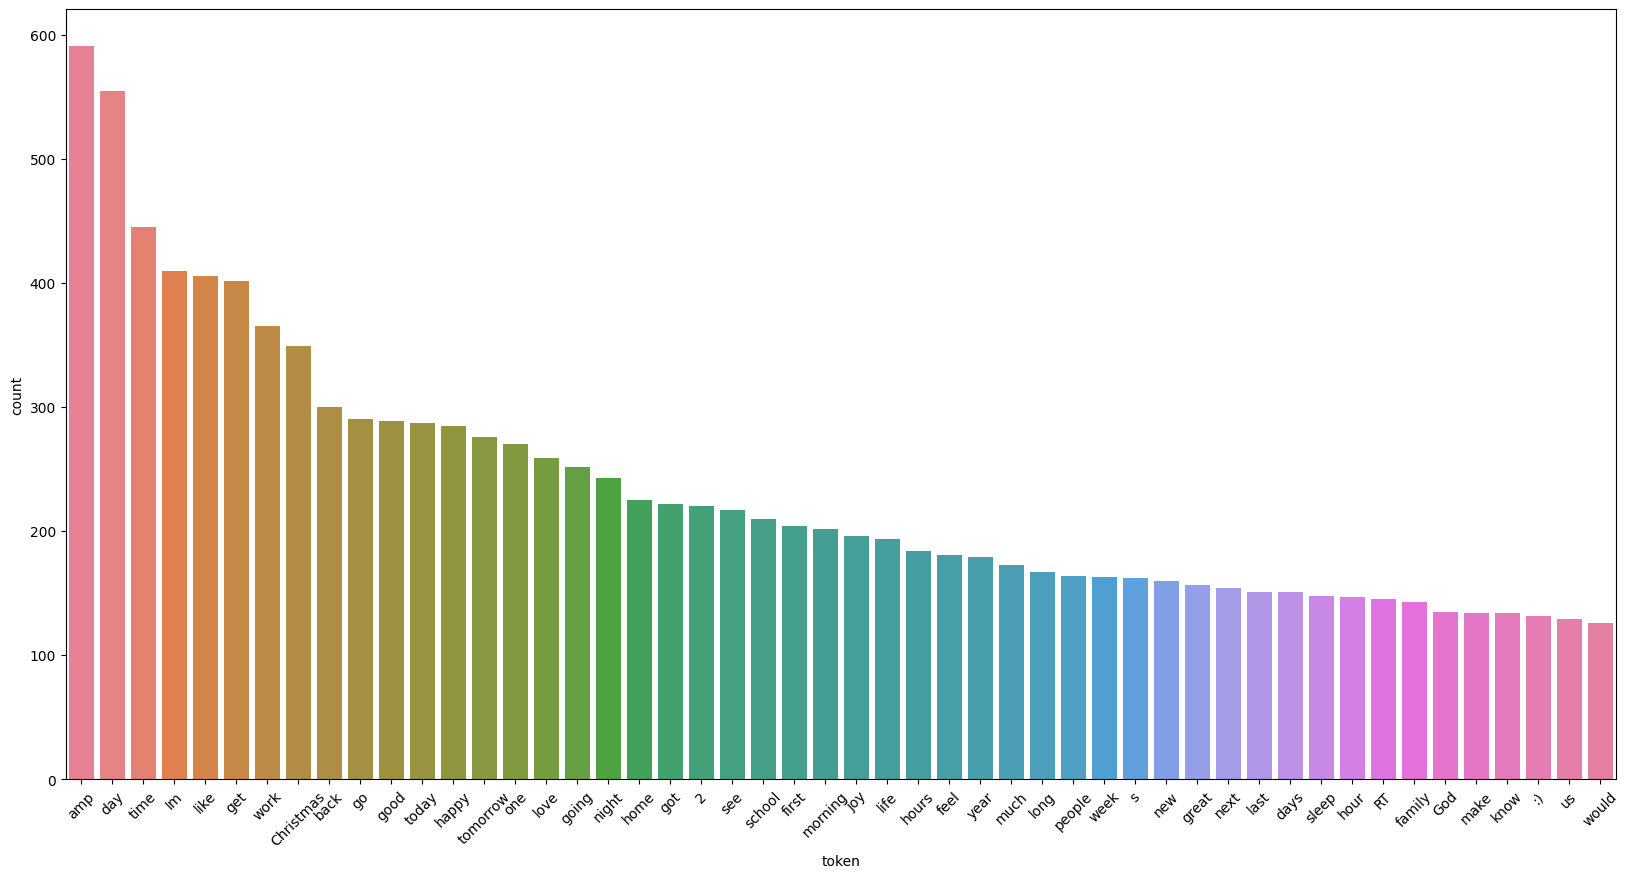

In [41]:
plot_most_common_words(keyword_joy)

In [42]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#Document it
surprise_docx = ''.join(surprise_list)
#Extract_keywords
keyword_surprise = extract_keywords(surprise_docx)

In [43]:
keyword_surprise

{'en': 264,
 'een': 263,
 'de': 218,
 'Im': 175,
 'know': 137,
 'van': 136,
 'one': 136,
 'home': 127,
 'ik': 117,
 'get': 110,
 'day': 108,
 'amp': 107,
 'met': 107,
 ':)': 106,
 'nog': 105,
 'voor': 103,
 'je': 101,
 'today': 99,
 'going': 99,
 'like': 97,
 'see': 96,
 'surprise': 93,
 'time': 93,
 'got': 90,
 'het': 89,
 'RT': 86,
 'wait': 80,
 'good': 78,
 'actually': 78,
 'birthday': 77,
 'coming': 76,
 'dan': 75,
 'tomorrow': 75,
 'go': 73,
 'night': 73,
 'even': 72,
 'love': 68,
 'u': 68,
 'friends': 67,
 'Christmas': 66,
 'la': 64,
 'op': 63,
 'back': 62,
 '5': 61,
 'new': 60,
 'think': 60,
 'make': 59,
 'away': 58,
 'te': 57,
 'special': 57}

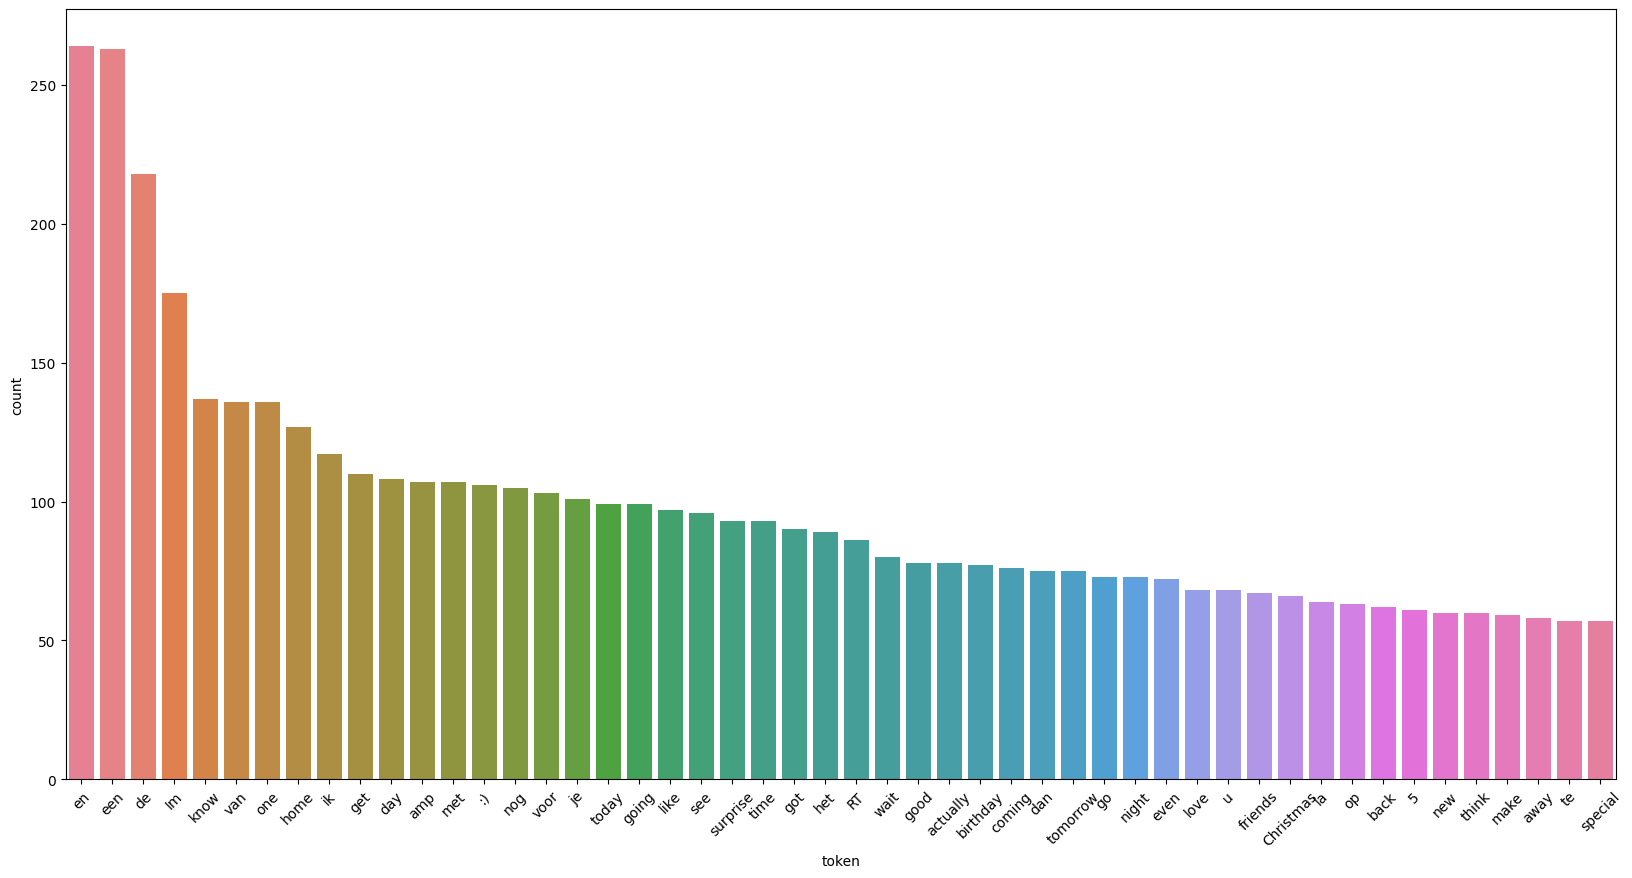

In [44]:
plot_most_common_words(keyword_surprise)

In [45]:
from wordcloud import WordCloud

In [46]:
def plot_cloud(docx):
  mywordcloud = WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation = 'bilinear')
  plt.show()

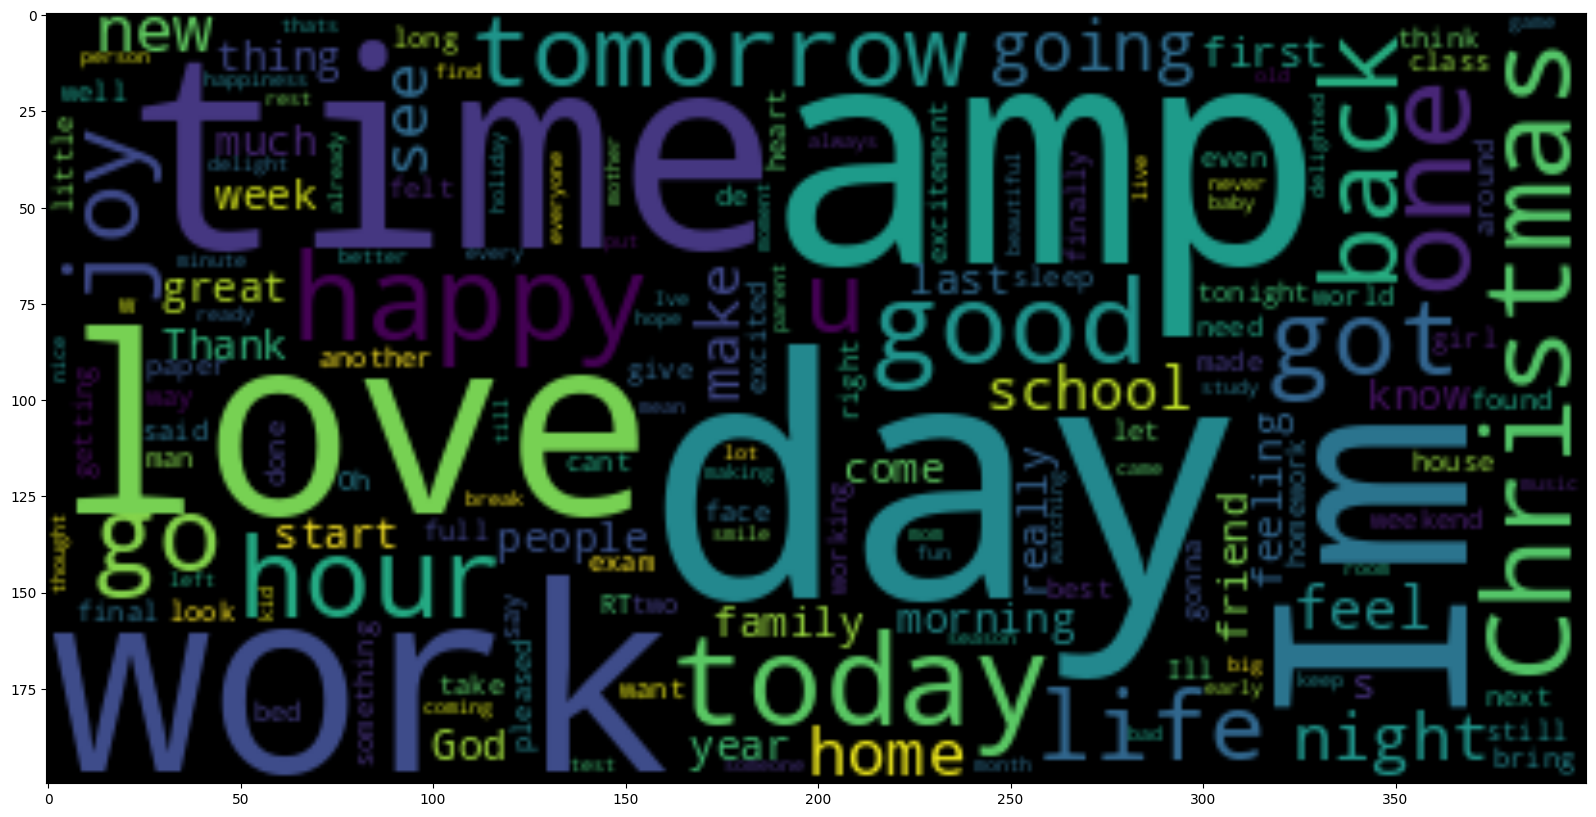

In [47]:
plot_cloud(joy_docx)

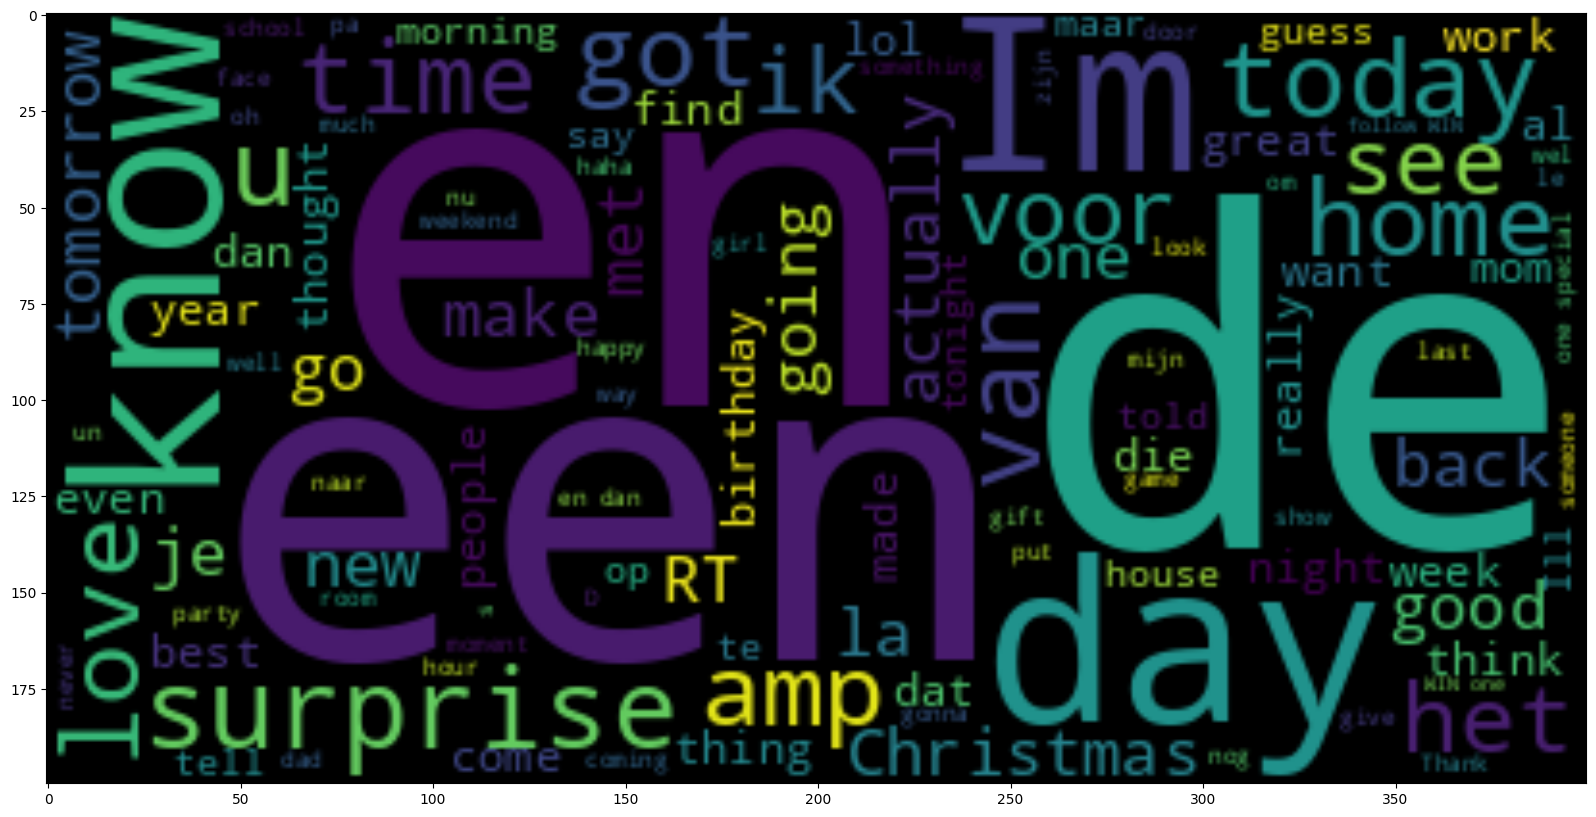

In [48]:
plot_cloud(surprise_docx)

##Machine learning
-Naive bayes
-LogisticRegression
-KNN
-DecisionTree

##Notes:

While both classification and regression are types of supervised learning algorithms, they differ in the type of output they predict. Classification algorithms predict discrete outputs such as ‘yes or no’, ‘spam or not spam’, or ‘cat, dog, or bird’. On the other hand, regression algorithms are used to predict continuous outputs. For example, a regression algorithm might predict the price of a house based on features like its size and location.
In short, use classification when your output is categorical, and regression when your output is numerical.



##KNN:
Instance-based means that KNN does not create a model from the training data but instead uses the training instances (or observations) themselves in the classification or prediction process.



##Naive bayes

Despite their simplicity, they are known for creating competent models, even when the ‘naive’ assumption they make doesn’t hold true.

#Logistic Regression
It is a predictive analysis algorithm, which, despite its name, is employed when the dependent variable is categorical. It’s particularly well-suited for binary classification problems — situations with two possible outcomes.

## Edit - shift this install at the top

In [ ]:
!pip install --upgrade scikit-learn

##Why do we use vectorizer?
Let’s say we have a dataset containing 100.000 data points
and we want to perform some sort of operation on every single
 one of those points. If we use a regular loop for this,
things will get very inefficient very quickly. If we can instead
vectorize our operation and just perform one (or a few) large vector or
matrix operation using something like NumPy, our code will run a lot faster

In [50]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vextorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
#Split our dataset
from sklearn.model_selection import train_test_split

In [52]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [53]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS RE...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
31430    block dream allow fear grow bigger faith ~Mary...
31431    feel old recognize Disney Channel shows Im old...
31432    dawned upon world promised creationGods salvat...
31433    computer school left name along four others ri...
31434                     feedback audience great  care ab
Name: Clean_Text, Length: 31435, dtype: object

In [54]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [55]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [56]:
# To dense array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X,ylabels,test_size = 0.3,random_state = 42)

In [58]:
###Build Our Model

In [59]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [60]:
#Accuracy
nv_model.score(X_test, y_test)

0.5530696638744566

In [61]:
# Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [62]:
y_pred_for_nv

array(['joy', 'joy', 'sadness', ..., 'sadness', 'joy', 'joy'], dtype='<U8')

### Make a single prediction
+ Vectorized out text
+ Applied our model

In [63]:
sample_text = ["I love coding so much"]

In [64]:
vect = cv.transform(sample_text).toarray()

In [65]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [66]:
#Check for predictions Probability(percentage)/ confidence score
nv_model.predict_proba(vect)

array([[2.02927388e-02, 3.37434240e-04, 1.23818183e-01, 5.35357261e-01,
        1.39074442e-03, 2.92341586e-01, 1.63347896e-06, 2.64604193e-02]])

In [67]:
# Get all classes for model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [68]:
np.max(nv_model.predict_proba(vect))

0.5353572611644907

In [77]:
def predict_emotion(sample_text, model):
  myvect = cv.transform(sample_text).toarray()
  prediction = model.predict(myvect)
  ## Edit - commented these lines as sklearn model doesnt have predict_proba function
  #pred_proba = model.predict_proba(myvect)
  #pred_percentage_for_all = dict(zip(model.classes_,model.pred_proba))
  return prediction[0]

In [76]:
predict_emotion(sample_text, nv_model)

joy


'joy'